# **Convolutional Neural Networks - AlexNet**
---
The following project show ...

Author: Pedro Zuñiga

In [1]:
# Import libraries
import torch
import torch.nn as nn

In [8]:
class MyAlexNet(nn.Module):
  def __init__(self):
    super(MyAlexNet, self).__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels = 3,
            out_channels = 96,
            kernel_size = (11,11),
            stride = (4,4),
            padding = (2,2)),
        nn.MaxPool2d(kernel_size = (3,3), stride = (2,2)),
        nn.ReLU()
        )

    self.conv2 = nn.Sequential(
        nn.Conv2d(
            in_channels = 96,
            out_channels = 256,
            kernel_size = (5,5),
            stride = (1,1),
            padding = (2,2)),
        nn.MaxPool2d(kernel_size = (3,3), stride = (2,2)),
        nn.ReLU()
        )

    self.conv3 = nn.Sequential(
        nn.Conv2d(
            in_channels = 256,
            out_channels = 384,
            kernel_size = (3,3),
            stride = (1,1),
            padding = (1,1)),
        nn.ReLU()
        )


    self.conv4 = nn.Sequential(
        nn.Conv2d(
            in_channels=384,
            out_channels=384,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1)),
        nn.ReLU()
        )

    self.conv5 = nn.Sequential(
        nn.Conv2d(
            in_channels=384,
            out_channels=256,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1)),
        nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
        nn.ReLU()
        )

    self.flat = nn.Flatten()

    self.fc6 = nn.Sequential(
        nn.Linear(9216, 4096),
        nn.ReLU()
        )

    self.fc7 = nn.Sequential(
        nn.Linear(4096, 4096),
        nn.ReLU()
        )

    self.fc8 = nn.Sequential(
        nn.Linear(4096, 102)
        )

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.flat(x)
    x = self.fc6(x)
    x = self.fc7(x)
    x = self.fc8(x)
    return x


In [3]:
!wget https://www.dropbox.com/s/kda4klivyttdb71/lab1_CNN_IA.zip -q --show-progress
!unzip lab1_CNN_IA.zip
!tar -xzf flowers.tar.gz

lab1_CNN_IA.zip     100%[===================>] 536.46M  83.8MB/s    in 6.7s    
Archive:  lab1_CNN_IA.zip
  inflating: test_model.py           
  inflating: flowers.py              
  inflating: flowers.tar.gz          
  inflating: alexnet.pth             


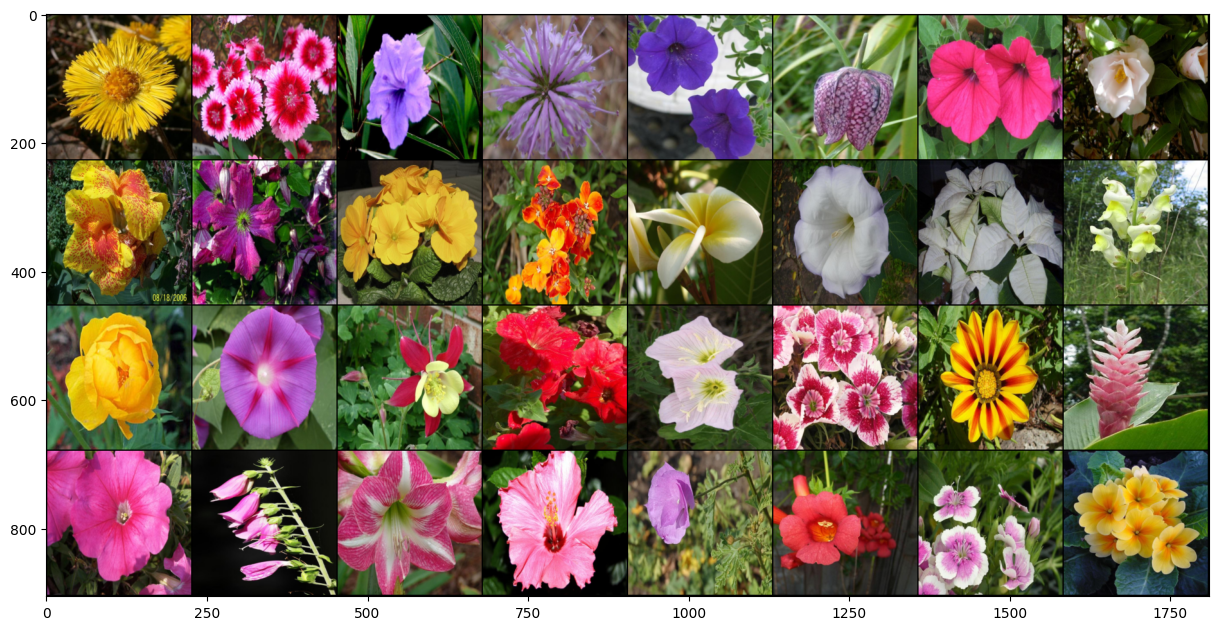

In [4]:
from flowers import Flowers
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor, Resize, Compose
import matplotlib.pyplot as plt

transforms = Compose([Resize((224, 224)), ToTensor()])
train_ds = Flowers("flowers_dataset/train", transform = transforms)
train_dl = DataLoader(train_ds, batch_size = 32, shuffle = True)
test_ds = Flowers("flowers_dataset/test", transform = transforms)
test_dl = DataLoader(test_ds, batch_size = 1024)

batch, _ = next(iter(train_dl))

plt.figure(figsize=(15,30))
photo = make_grid(batch, nrow=8).permute(1,2,0)

r = plt.imshow(photo)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using {device}')

using cuda


In [9]:
model = MyAlexNet().cuda()

In [11]:
w = torch.load("alexnet.pth")
model.load_state_dict(w)

<All keys matched successfully>

In [12]:
from test_model import test_model
test_model(model, test_dl)

Correctas: 697.0 Total: 1738.0 Accuracy: 40.10%